# Logistic regression

Aplica para variables binarias (o probabilidad de que esta ocurra)

A continuación, enumeramos algunos beneficios del uso de la regresión logística en comparación con otras técnicas de ML.

## Simplicidad

Los modelos de regresión logística son matemáticamente menos complejos que otros métodos de ML. Por lo tanto, puede implementarlos incluso si nadie de su equipo tiene una profunda experiencia en ML.

## Velocidad

Los modelos de regresión logística pueden procesar grandes volúmenes de datos a alta velocidad porque requieren menos capacidad computacional, como memoria y potencia de procesamiento. Esto los hace ideales para que las organizaciones que están empezando con proyectos de ML obtengan ganancias rápidas.

## Flexibilidad

Puede usar la regresión logística para encontrar respuestas a preguntas que tienen dos o más resultados finitos. También puede usarlo para preprocesar datos. Por ejemplo, puede ordenar los datos con un amplio rango de valores, como las transacciones bancarias, en un rango de valores más pequeño y finito mediante la regresión logística. A continuación, puede procesar este conjunto de datos más pequeño mediante el uso de otras técnicas de ML para obtener un análisis más preciso.

## Visibilidad

El análisis de regresión logística ofrece a los desarrolladores una mayor visibilidad de los procesos de software internos que otras técnicas de análisis de datos. La solución de problemas y la corrección de errores también son más fáciles porque los cálculos son menos complejos.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import Series, DataFrame
from pylab import rcParams

import sklearn
# import the logistic regression model, as well as the metrics module from Scikit Learn - that's useful for scoring our predictive models.
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')

## Logistic regression on the titanic dataset

This data came from Kaggle (https://www.kaggle.com/c/titanic/data)

Los supuestos para que esto ocurra debe ser:

* No tener valores nulos.
* El valor a predecir debe ser binario u ordinal
* Todos los predictores deben ser independientes unos del otro
* Hay al menos 50 observaciones por varialbe predictora

In [4]:
url = '../data/titanic-training-data.csv'
titanic_training = pd.read_csv(url)
titanic_training.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
print(titanic_training.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
print(titanic_training.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Just a quick fyi (we will examine these variables more closely in a minute):

##### VARIABLE DESCRIPTIONS

Survived - Survival (0 = No; 1 = Yes)<br>
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
Name - Name<br>
Sex - Sex<br>
Age - Age<br>
SibSp - Number of Siblings/Spouses Aboard<br>
Parch - Number of Parents/Children Aboard<br>
Ticket - Ticket Number<br>
Fare - Passenger Fare (British pound)<br>
Cabin - Cabin<br>
Embarked - Port of Embarkation (C = Cherbourg, France; Q = Queenstown, UK; S = Southampton - Cobh, Ireland)

<Axes: xlabel='Survived', ylabel='count'>

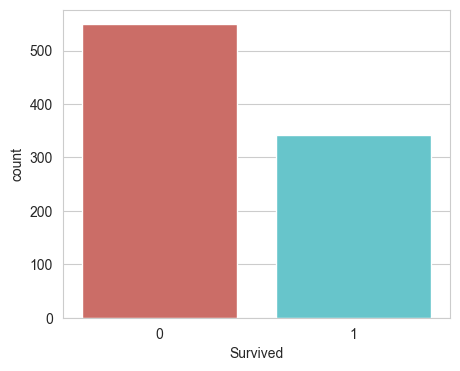

In [7]:
sns.countplot(x='Survived', hue='Survived', data=titanic_training, palette='hls', legend=False)

In [8]:
titanic_training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic_training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic_data =titanic_training.drop(['Name','Ticket','Cabin'], axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Parch', ylabel='Age'>

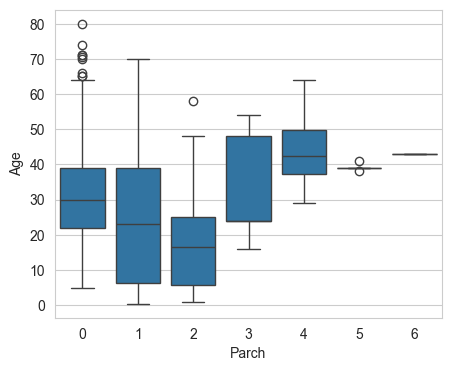

In [11]:
sns.boxplot(x='Parch', y='Age', data=titanic_data)

In [12]:
Parch_groups = titanic_data.groupby(titanic_data['Parch'])
Parch_groups.mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [13]:
def age_approx(cols):
  Age = cols.iloc[0]
  Parch = cols.iloc[1]

  if pd.isnull(Age):
    if Parch == 0:
      return 32
    elif Parch == 1:
      return 24
    elif Parch == 2:
      return 17
    elif Parch == 3:
      return 33
    elif Parch == 4:
      return 45
    else:
      return 30
    
  else:
    return Age


In [14]:
titanic_data['Age'] = titanic_data[['Age','Parch']].apply(age_approx, axis=1)
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [15]:
titanic_data.dropna(inplace=True)
titanic_data.reset_index(inplace=True, drop=True)

print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB
None


In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
gender_cat = titanic_data['Sex']
#### Male = 1
gender_encoded = label_encoder.fit_transform(gender_cat)
gender_encoded[0:5]

array([1, 0, 0, 0, 1])

In [17]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [18]:
gender_df = pd.DataFrame(gender_encoded, columns=['male_gender'])
gender_df.head()

,male_gender
0,1
1,0
2,0
3,0
4,1


In [19]:
embarked_cat = titanic_data['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[:100]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2])

In [20]:
from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories='auto')
embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_1hot_mat = embarked_1hot.toarray()
embarked_df = pd.DataFrame(embarked_1hot_mat, columns=['C','Q','S'])
embarked_df.head()
                           

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [25]:
titanic_data.drop(['Sex','Embarked'],axis=1, inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [26]:
titanic_dmy = pd.concat([titanic_data, gender_df, embarked_df],axis=1,verify_integrity=True).astype(float)
titanic_dmy[0:5]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male_gender,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


Como vimos antes en los supuestos, las variables explicativas no deben estar correlacionadas entre sí. Por eso realizamos el siguiente gráfico donde se muestran las correlaciones y no debería haber colores claros u oscuros. El primer aspecto que vemos es Fare y Pclass que por intuición se puede ver que sí hay una fuerte relación.

<Axes: >

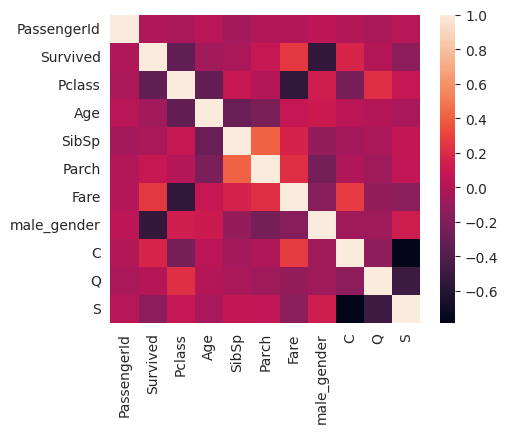

In [21]:
sns.heatmap(titanic_dmy.corr())

In [27]:
titanic_dmy.drop(['Fare'], axis=1, inplace=True)
titanic_dmy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male_gender,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


In [23]:
titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    float64
 1   Survived     889 non-null    float64
 2   Pclass       889 non-null    float64
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    float64
 5   Parch        889 non-null    float64
 6   male_gender  889 non-null    float64
 7   C            889 non-null    float64
 8   Q            889 non-null    float64
 9   S            889 non-null    float64
dtypes: float64(10)
memory usage: 69.6 KB


In [29]:
X_train, X_test, y_train, y_test = train_test_split(titanic_dmy.drop('Survived', axis=1),
                                                    titanic_dmy['Survived'], test_size=0.20,
                                                    random_state=200)

In [30]:
print(X_train.shape)
print(y_train.shape)


(711, 9)
(711,)


In [31]:
X_train[0:5]

,PassengerId,Pclass,Age,SibSp,Parch,male_gender,C,Q,S
719,721.0,2.0,6.0,0.0,1.0,0.0,0.0,0.0,1.0
165,167.0,1.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0
879,882.0,3.0,33.0,0.0,0.0,1.0,0.0,0.0,1.0
451,453.0,1.0,30.0,0.0,0.0,1.0,1.0,0.0,0.0
181,183.0,3.0,9.0,4.0,2.0,1.0,0.0,0.0,1.0


In [32]:
LogReg=LogisticRegression(solver='liblinear')
LogReg.fit(X_train.values, y_train.values)

LogisticRegression(solver='liblinear')

In [33]:
y_pred = LogReg.predict(X_test.values)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       109
         1.0       0.84      0.70      0.76        69

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178



In [34]:
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[384,  56],
       [ 90, 181]])

In [35]:
precision_score(y_train, y_train_pred)

np.float64(0.7637130801687764)

In [36]:
titanic_dmy[863:864]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male_gender,C,Q,S
863,866.0,1.0,2.0,42.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
test_passenger = np.array(['866','2','40','0','0','0','0','0','1']).astype(float).reshape(1,-1)

print(LogReg.predict(test_passenger))
print(LogReg.predict_proba(test_passenger))

[1.]
[[0.24592161 0.75407839]]


In [38]:
test_passenger

array([[866.,   2.,  40.,   0.,   0.,   0.,   0.,   0.,   1.]])

In [39]:
np.array(['866','2','40','0','0','0','0','0','1']).astype(float).reshape(-1,1)

array([[866.],
       [  2.],
       [ 40.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  1.]])

# Modelo propio

In [10]:
import pandas as pd
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, scale
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_csv('data/MBA.csv')

In [5]:
binary_encoder = OneHotEncoder(categories='auto', drop='first')
one_hot_df = binary_encoder.fit_transform(df[["gender","international","major","race","work_industry"]]).todense()
column_names = binary_encoder.get_feature_names_out(["gender","international","major","race","work_industry"])
one_hot_df = pd.DataFrame(one_hot_df, columns=column_names)
new_df = pd.concat([one_hot_df,df[["gpa","gmat","work_exp","admission"]]], axis=1, verify_integrity=True)

In [6]:
new_df["admission"]=new_df["admission"].fillna("Not admited")
le = LabelEncoder()
le.fit(new_df["admission"])
new_df["admission"]=le.transform(new_df["admission"])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(columns="admission").apply(scale),new_df["admission"], test_size=0.2)

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print(MSE,r2)
print(cm)
print("train",accuracy_score(y_train,model.predict(X_train)))
print("test",accuracy_score(y_test,y_pred))

0.16707021791767554 -0.18766091836923726
[[  26  154    0]
 [  31 1012    0]
 [   2   14    0]]
train 0.8377396569122099
test 0.837772397094431
